# Image Tutorial Notes

## Links

- Tutorial pages:
  * [Matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)
  * [Image manipulation and processing using Numpy and Scipy](http://www.scipy-lectures.org/advanced/image_processing/)
- Image file formats:
  * [PNG (Portable Network Graphics) Wiki](https://en.wikipedia.org/wiki/Portable_Network_Graphics)
  * [Comparison of graphics file formats](https://en.wikipedia.org/wiki/Comparison_of_graphics_file_formats)
- Stackoverflow:
  * [Matplotlib reads jpg into int8 and png into normalized float](https://stackoverflow.com/questions/46013594/matplotlib-reads-jpg-into-int8-and-png-into-normalized-float)
- Libraries:
  * [matplotlib.image](https://matplotlib.org/2.0.2/api/image_api.html)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc

butterfly = mpimg.imread('butterfly.jpg')
fox = misc.face()
print('butterfly\'s shape: {}'.format(butterfly.shape))
print('fox\'s shape: {}'.format(fox.shape))
fox.shape, fox.dtype

butterfly's shape: (3264, 1836, 3)
fox's shape: (768, 1024, 3)


((768, 1024, 3), dtype('uint8'))

In [ ]:
misc.imsave('butterfly.png', butterfly)
butterflypng = mpimg.imread('butterfly.png')
print(butterflypng.shape)
pngbflyplot = plt.imshow(butterflypng)

## Plotting numpy arrays as images

In [ ]:
imgplot = plt.imshow(butterfly)

### Applying pseudocolor schemes to image plots

In [ ]:
plt.imshow(butterfly[:, :, 0])

In [ ]:
plt.imshow(butterfly[:, :, 0], cmap = 'hot')

In [ ]:
# imgplot = plt.imshow(butterfly[:, :, 0])
imgplot = plt.imshow(butterfly)
plt.colorbar()

### Following not quite working

In [ ]:
# plt.hist(butterfly[:, :, 0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.hist(butterflynorm[:, :, 0].ravel(), bins=256, fc='k', ec='k')

In [ ]:
butterfly[:, :, 0].ravel()

In [ ]:
imgplot = plt.imshow(butterfly, clim=(0.0, 0.7))

In [ ]:
# butterflynorm = butterfly / np.linalg.norm(butterfly)
butterflynorm = butterfly / 256.0

In [ ]:
butterflypng

In [ ]:
np.all(butterflynorm == butterflypng)

In [ ]:
plt.imshow(butterflynorm)

# Note for [Image manipulation and processing using Numpy and Scipy](http://www.scipy-lectures.org/advanced/image_processing/)


In [21]:
from scipy import ndimage

el = ndimage.generate_binary_structure(2, 1)
print(el)
print(el.astype(np.int))

[[False  True False]
 [ True  True  True]
 [False  True False]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [ ]:
a = np.zeros((7, 7), dtype = np.int)
a[1:6, 2:5] = 1
# ndimage.binary_erosion(a).astype(a.dtype)
ndimage.binary_erosion(a, structure = np.ones((5, 5))).astype(a.dtype)

In [27]:
b = np.zeros((5, 5))
b[2, 2] = 1
ndimage.binary_dilation(b).astype(b.dtype)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
np.random.seed(2)
im = np.zeros((64, 64))
x, y = (63 * np.random.random((2, 8))).astype(np.int)
im[x, y] = np.arange(8)
bigger_points = ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))
square = np.zeros((16, 16))
square[4:-4, 4:-4] = 1
dist = ndimage.distance_transform_bf(square)
dilate_dist = ndimage.grey_dilation(dist, size=(3, 3), structure=np.ones((3, 3)))


plt.figure(figsize=(12.5, 3))
plt.subplot(141)
plt.imshow(im, interpolation='nearest', cmap=plt.cm.spectral)
plt.axis('off')
plt.subplot(142)
plt.imshow(bigger_points, interpolation='nearest', cmap=plt.cm.spectral)
plt.axis('off')
plt.subplot(143)
plt.imshow(dist, interpolation='nearest', cmap=plt.cm.spectral)
plt.axis('off')
plt.subplot(144)
plt.imshow(dilate_dist, interpolation='nearest', cmap=plt.cm.spectral)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im += 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

In [30]:
face = misc.face(gray = True)
face[0, 40]

127

In [15]:
face.shape, face.dtype
lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]

In [16]:
scikitimg = mpimg.imread('http://scikit-image.org/_static/img/logo.png')

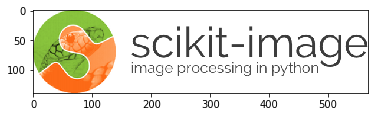

In [19]:
plt.imshow(scikitimg)

## Mathematical morphology
[wiki](https://en.wikipedia.org/wiki/Mathematical_morphology)
